In [1]:
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.cluster import KMeans
import sklearn.metrics as sm
import pandas as pd
import numpy as np
from sklearn.mixture import GaussianMixture
from sklearn import preprocessing

In [2]:
iris = datasets.load_iris()

In [3]:
X = pd.DataFrame(iris.data)
X.columns = ['Sepal_Length','Sepal_Width','Petal_Length','Petal_Width']

In [4]:
Y = pd.DataFrame(iris.target)
Y.columns = ['Targets']

In [5]:
model = KMeans(n_clusters=3)
model.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [6]:
model.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0])

In [7]:
plt.figure(figsize=(14,7))

<Figure size 1008x504 with 0 Axes>

<Figure size 1008x504 with 0 Axes>

In [8]:
colormap = np.array(['red','lime','black'])

Text(0.5, 1.0, 'Real Classification')

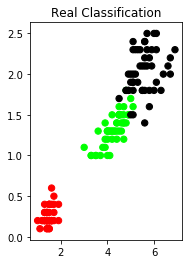

In [9]:
plt.subplot(1,2,1)
plt.scatter(X.Petal_Length,X.Petal_Width,c = colormap[Y.Targets],s = 40)
plt.title('Real Classification')

Text(0.5, 1.0, 'K Mean Classification')

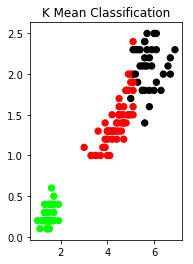

In [10]:
plt.subplot(1,2,2)
plt.scatter(X.Petal_Length,X.Petal_Width,c = colormap[model.labels_],s = 40)
plt.title('K Mean Classification')

In [11]:
plt.figure(figsize=(14,7))


<Figure size 1008x504 with 0 Axes>

<Figure size 1008x504 with 0 Axes>

In [12]:
predY = np.choose(model.labels_,[0,1,2]).astype(np.int64)


In [13]:
print(predY)


[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 2 2 2 2 0 2 2 2 2
 2 2 0 0 2 2 2 2 0 2 0 2 0 2 2 0 0 2 2 2 2 2 0 2 2 2 2 0 2 2 2 0 2 2 2 0 2
 2 0]


Text(0.5, 1.0, 'Real Classification')

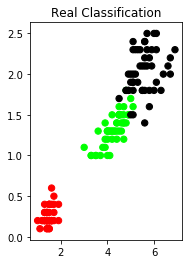

In [14]:
plt.subplot(1,2,1)
plt.scatter(X.Petal_Length,X.Petal_Width,c = colormap[Y.Targets],s = 40)
plt.title('Real Classification')


Text(0.5, 1.0, 'K Mean Classification')

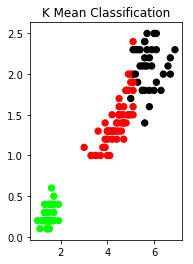

In [15]:
plt.subplot(1, 2, 2)
plt.scatter(X.Petal_Length,X.Petal_Width, c=colormap[predY], s=40)
plt.title('K Mean Classification')


In [16]:
print('The accuracy score of k-mean : ',sm.accuracy_score(Y,model.labels_))


The accuracy score of k-mean :  0.24


In [17]:
print('The confusion matrix of k-mean : ',sm.confusion_matrix(Y,model.labels_))


The confusion matrix of k-mean :  [[ 0 50  0]
 [48  0  2]
 [14  0 36]]


In [19]:
scaler = preprocessing.StandardScaler()
scaler.fit(X)
scaler.fit(X)
xsa = scaler.transform(X)
xs = pd.DataFrame(xsa,columns=X.columns)

In [20]:
gmm = GaussianMixture(n_components=3)
gmm.fit(xs)

GaussianMixture(covariance_type='full', init_params='kmeans', max_iter=100,
        means_init=None, n_components=3, n_init=1, precisions_init=None,
        random_state=None, reg_covar=1e-06, tol=0.001, verbose=0,
        verbose_interval=10, warm_start=False, weights_init=None)

In [21]:
y_cluster_gmm = gmm.predict(xs)


Text(0.5, 1.0, 'GMM classification')

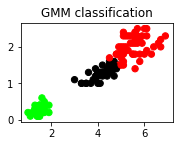

In [22]:
plt.subplot(2,2,3)
plt.scatter(X.Petal_Length,X.Petal_Width,c = colormap[y_cluster_gmm],s = 40)
plt.title('GMM classification')

In [23]:
print('The accuracy score of k-mean : ',sm.accuracy_score(Y,y_cluster_gmm))


The accuracy score of k-mean :  0.0


In [24]:
print('The confusion matrix of k-mean : ',sm.confusion_matrix(Y,y_cluster_gmm))


The confusion matrix of k-mean :  [[ 0 50  0]
 [ 5  0 45]
 [50  0  0]]
